In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import math

In [121]:
df = pd.read_csv('prepared_data/back.csv')
df

,Unnamed: 0,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,0,CLIMBING,"[[-6.850950241088867, 6.60105037689209, -1.287...","[[0.29122498631477356, 0.5505499839782715, 0.2...","[[65.8125, -19.012500762939453, 16.80000114440...",20
1,1,FALLING,"[[-5.451000213623047, 7.82895040512085, 1.9920...","[[-0.07741250097751617, 0.2190375030040741, -0...","[[32.34375, -38.94375228881836, -29.3437519073...",70
2,2,SUCCESSFULL,"[[6.903000354766846, -1.7880001068115234, -4.9...","[[-0.23718750476837158, 0.36121249198913574, 0...","[[-37.91250228881836, 10.143750190734863, -6.3...",85
3,3,WALKING,"[[-6.942000389099121, 5.0400004386901855, -0.0...","[[0.1816374957561493, -0.605412483215332, 0.25...","[[34.14375305175781, -34.20000076293945, 15.95...",25
4,4,CLIMBING,"[[-6.130050182342529, 6.98805046081543, 2.9569...","[[0.11261250078678131, 0.16541250050067902, -0...","[[30.187501907348633, -6.056250095367432, -4.1...",50
5,5,FALLING,"[[-5.57295036315918, 7.07205057144165, 1.01295...","[[0.46131250262260437, 0.5150749683380127, -0....","[[32.34375, -40.38750076293945, -23.2875003814...",2
6,6,SUCCESSFULL,"[[6.709050178527832, -7.123950481414795, -0.58...","[[0.08277499675750732, -0.210099995136261, -0....","[[-26.45625114440918, 22.087501525878906, -27....",85
7,7,WALKING,"[[-3.0010502338409424, 7.975050449371338, 0.62...","[[-0.16554999351501465, -1.0306999683380127, -...","[[21.11250114440918, -35.75625228881836, 12.90...",25
8,8,CLIMBING,"[[-7.414050579071045, 7.0819501876831055, 1.23...","[[0.489362508058548, -0.05211250111460686, -0....","[[32.04375076293945, -19.743751525878906, -18....",60
9,9,FALLING,"[[-4.780050277709961, 6.909000396728516, 0.280...","[[-0.20446249842643738, 0.1387374997138977, 0....","[[37.80000305175781, -22.856250762939453, -12....",2


In [122]:
# Convert string to list of list of floats
df['Accelerometer'] = df['Accelerometer'].apply(eval)
df['Gyroscope'] = df['Gyroscope'].apply(eval)
df['Magnetometer'] = df['Magnetometer'].apply(eval)

In [123]:
labels = ["CLIMBING","FALLING","SUCCESSFULL","WALKING"]

data = {
    "Category": labels,
    "Accelerometer": [[] for _ in range(4)],
    "Gyroscope": [[] for _ in range(4)],
    "Magnetometer": [[] for _ in range(4)],
    "Duration": [0] * 4
}

new_df = pd.DataFrame(data)

print(new_df)
# Iterowanie po wierszach oryginalnego DataFrame
for i, row in df.iterrows():
    label = row["Category"]
    index = labels.index(row["Category"])

    new_df.at[index, "Accelerometer"].extend(row["Accelerometer"])
    new_df.at[index, "Gyroscope"].extend(row["Gyroscope"])
    new_df.at[index, "Magnetometer"].extend(row["Magnetometer"])
    new_df.loc[index, "Duration"] += row["Duration"]


new_df

      Category Accelerometer Gyroscope Magnetometer  Duration
0     CLIMBING            []        []           []         0
1      FALLING            []        []           []         0
2  SUCCESSFULL            []        []           []         0
3      WALKING            []        []           []         0


,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,CLIMBING,"[[-6.850950241088867, 6.60105037689209, -1.287...","[[0.29122498631477356, 0.5505499839782715, 0.2...","[[65.8125, -19.012500762939453, 16.80000114440...",352
1,FALLING,"[[-5.451000213623047, 7.82895040512085, 1.9920...","[[-0.07741250097751617, 0.2190375030040741, -0...","[[32.34375, -38.94375228881836, -29.3437519073...",85
2,SUCCESSFULL,"[[6.903000354766846, -1.7880001068115234, -4.9...","[[-0.23718750476837158, 0.36121249198913574, 0...","[[-37.91250228881836, 10.143750190734863, -6.3...",276
3,WALKING,"[[-6.942000389099121, 5.0400004386901855, -0.0...","[[0.1816374957561493, -0.605412483215332, 0.25...","[[34.14375305175781, -34.20000076293945, 15.95...",200


In [124]:
def plot_xyz(accelerometer_data, gyroscope_data, magnetometer_data,duration,plot_title):
    # Rozpakowanie danych XYZ dla akcelerometru
    accel_x = [item[0] for item in accelerometer_data]
    accel_y = [item[1] for item in accelerometer_data]
    accel_z = [item[2] for item in accelerometer_data]

    # Rozpakowanie danych XYZ dla żyroskopu
    gyro_x = [item[0] for item in gyroscope_data]
    gyro_y = [item[1] for item in gyroscope_data]
    gyro_z = [item[2] for item in gyroscope_data]

    # Rozpakowanie danych XYZ dla magnetometru
    mag_x = [item[0] for item in magnetometer_data]
    mag_y = [item[1] for item in magnetometer_data]
    mag_z = [item[2] for item in magnetometer_data]

    # Tworzenie subplots z 1 wierszem i 3 kolumnami
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Tworzenie osi czasu
    time = np.linspace(0, duration, len(accel_x))

    # Tworzenie wykresu dla parametru Accelerometer
    axs[0].plot(time,accel_x, color='red', label='X')
    axs[0].plot(time,accel_y, color='green', label='Y')
    axs[0].plot(time,accel_z, color='blue', label='Z')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Value')
    axs[0].set_title('Accelerometer')
    axs[0].legend()

    # Tworzenie osi czasu
    time = np.linspace(0, duration, len(gyro_x))

    # Tworzenie wykresu dla parametru Gyroscope
    axs[1].plot(time,gyro_x, color='red', label='X')
    axs[1].plot(time,gyro_y, color='green', label='Y')
    axs[1].plot(time,gyro_z, color='blue', label='Z')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Gyroscope')
    axs[1].legend()

    # Tworzenie osi czasu
    time = np.linspace(0, duration, len(mag_x))

    # Tworzenie wykresu dla parametru Magnetometer
    axs[2].plot(time,mag_x, color='red', label='X')
    axs[2].plot(time,mag_y, color='green', label='Y')
    axs[2].plot(time,mag_z, color='blue', label='Z')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Value')
    axs[2].set_title('Magnetometer')
    axs[2].legend()


    # Ustawienie odpowiednich limitów na osi X
    for ax in axs:
        ax.set_xlim(0, duration)

    fig.suptitle(plot_title)

    # Dostosowanie układu subplots
    plt.tight_layout()

    # Wyświetlenie wykresów
    plt.show()

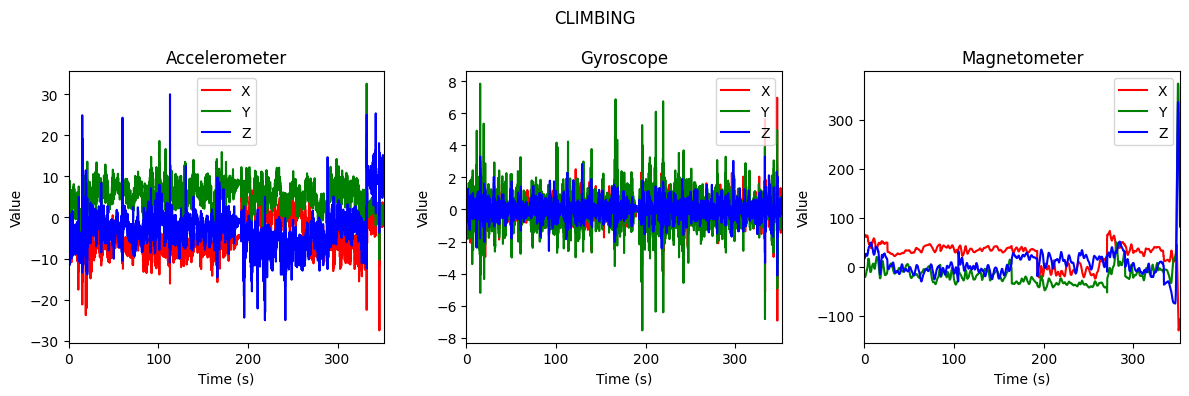

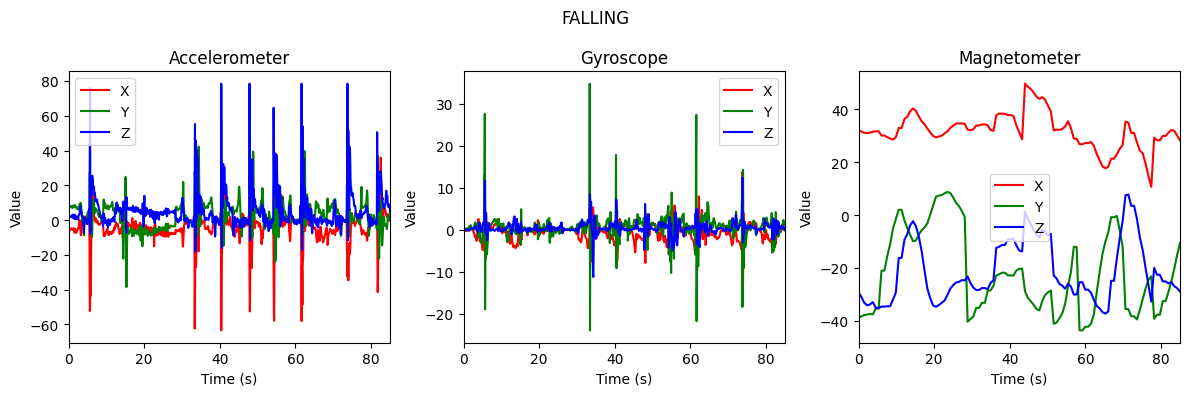

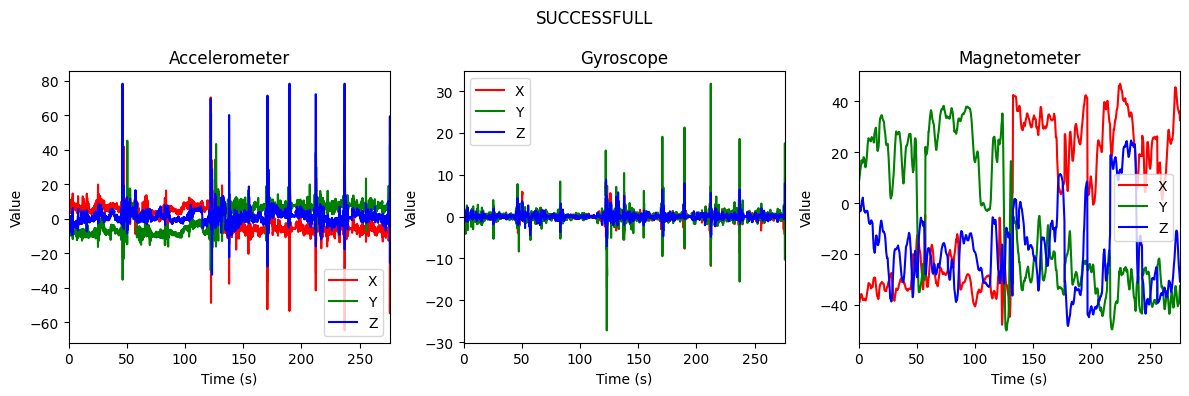

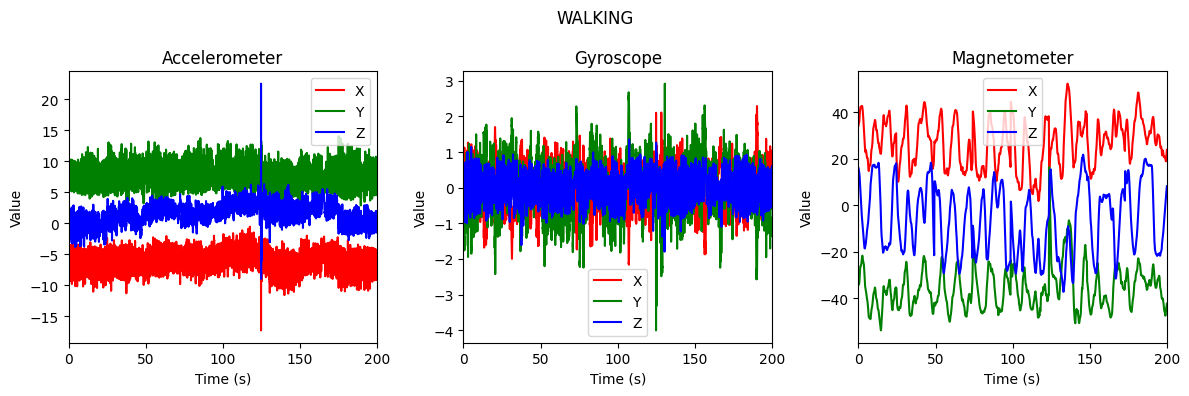

In [125]:
# Iterowanie po wierszach oryginalnego DataFrame
for _, row in new_df.iterrows():
    plot_xyz(row["Accelerometer"],row["Gyroscope"],row["Magnetometer"],row["Duration"],row["Category"])

In [126]:
def calculate_sensor_stats(accelerometer_data, gyroscope_data, magnetometer_data, threshold,scenario):
    # Obliczenie długości list akcelerometru, żyroskopu i magnetometru
    accel_lengths = len(accelerometer_data)
    gyro_lengths = len(gyroscope_data)
    magnet_lengths = len(magnetometer_data)

    # Obliczenie średnich wartości dla X, Y, Z
    accel_means = np.mean(accelerometer_data, axis=0)
    gyro_means = np.mean(gyroscope_data, axis=0)
    magnet_means = np.mean(magnetometer_data, axis=0)

    # Obliczenie odchyleń dla każdej z wartości XYZ na podstawie procentowego thresholdu
    accel_deviations = np.abs(accelerometer_data - accel_means) / accel_means * 100
    gyro_deviations = np.abs(gyroscope_data - gyro_means) / gyro_means * 100
    magnet_deviations = np.abs(magnetometer_data - magnet_means) / magnet_means * 100

    devation_x = [accel_deviations[:, 0], gyro_deviations[:, 0], magnet_deviations[:, 0]]
    devation_y = [accel_deviations[:, 1], gyro_deviations[:, 1], magnet_deviations[:, 1]]
    devation_z = [accel_deviations[:, 2], gyro_deviations[:, 2], magnet_deviations[:, 2]]

    above_x = []
    above_y = []
    above_z = []

    for i, dev in enumerate(devation_x):
        above_x.append(len(dev[dev > threshold]))

    for i, dev in enumerate(devation_y):
        above_y.append(len(dev[dev > threshold]))

    for i, dev in enumerate(devation_z):
        above_z.append(len(dev[dev > threshold]))

    # Tworzenie DataFrame z obliczonymi wartościami
    data = {
        "Scenario": [" ",scenario," "],
        "Sensor": ["Accelerometer", "Gyroscope", "Magnetometer"],
        "Length": [accel_lengths, gyro_lengths, magnet_lengths],
        "Mean_X": [accel_means[0], gyro_means[0], magnet_means[0]],
        "Mean_Y": [accel_means[1], gyro_means[1], magnet_means[1]],
        "Mean_Z": [accel_means[2], gyro_means[2], magnet_means[2]],
        "Threshold (%)": [threshold,threshold,threshold],
        "X > Threshold": above_x,
        "Y > Threshold": above_y,
        "Z > Threshold": above_z
    }

    df = pd.DataFrame(data)
    
    return df

In [127]:
stats_list = []

for _, row in new_df.iterrows():
    stats = calculate_sensor_stats(row["Accelerometer"], row["Gyroscope"], row["Magnetometer"], 150, row["Category"])
    stats_list.extend([stats.iloc[0],stats.iloc[1],stats.iloc[2]])
    stats_list.append(pd.Series([' ', ' ',' ',' ',' ',' ',' ',' ',' ',' '], index=stats.columns, dtype='object'))

df_stats = pd.DataFrame(stats_list)
df_stats.reset_index(drop=True, inplace=True)
df_stats

,Scenario,Sensor,Length,Mean_X,Mean_Y,Mean_Z,Threshold (%),X > Threshold,Y > Threshold,Z > Threshold
0,,Accelerometer,13640,-4.534796,5.241654,-3.000191,150,0,165,0
1,CLIMBING,Gyroscope,13621,0.004937,-0.009721,-0.001422,150,13434,0,0
2,,Magnetometer,1360,25.782643,-14.139541,6.229729,150,127,0,938
3,,,,,,,,,,
4,,Accelerometer,1150,-4.304177,2.709384,4.825443,150,0,645,240
5,FALLING,Gyroscope,1150,-0.707299,0.466546,0.409044,150,0,645,437
6,,Magnetometer,113,31.913829,-21.815875,-21.334182,150,0,0,0
7,,,,,,,,,,
8,,Accelerometer,10429,-0.004592,0.936088,1.375529,150,0,10136,4813
9,SUCCESSFULL,Gyroscope,10430,-0.024721,0.06253,0.041739,150,0,8533,8661
